<a href="https://colab.research.google.com/github/Rodiat/FDSfE_RAyinde/blob/main/InClass/10_25_2022LogRegre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import pylab as plt
import numpy as np

In [2]:
bnk = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/bank_term_deposit.csv")

In [3]:
bnk.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,38,blue-collar,married,secondary,no,1663,yes,no,cellular,13,apr,217,3,327,1,failure,no
1,38,blue-collar,divorced,secondary,no,595,yes,no,cellular,7,may,245,3,-1,0,unknown,no
2,34,blue-collar,married,secondary,no,360,yes,no,telephone,19,nov,46,1,182,2,failure,no
3,60,admin.,married,secondary,no,1025,no,no,cellular,6,aug,388,8,-1,0,unknown,no
4,42,management,married,tertiary,no,520,no,no,cellular,4,nov,158,1,-1,0,unknown,no


In [4]:
bnk.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1037,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes
1038,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes
1039,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
1040,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes
1041,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes


In [5]:
bnk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1042 non-null   int64 
 1   job        1042 non-null   object
 2   marital    1042 non-null   object
 3   education  1042 non-null   object
 4   default    1042 non-null   object
 5   balance    1042 non-null   int64 
 6   housing    1042 non-null   object
 7   loan       1042 non-null   object
 8   contact    1042 non-null   object
 9   day        1042 non-null   int64 
 10  month      1042 non-null   object
 11  duration   1042 non-null   int64 
 12  campaign   1042 non-null   int64 
 13  pdays      1042 non-null   int64 
 14  previous   1042 non-null   int64 
 15  poutcome   1042 non-null   object
 16  y          1042 non-null   object
dtypes: int64(7), object(10)
memory usage: 138.5+ KB


In [6]:
bnk["y"]

0        no
1        no
2        no
3        no
4        no
       ... 
1037    yes
1038    yes
1039    yes
1040    yes
1041    yes
Name: y, Length: 1042, dtype: object

In [7]:
bnk["y"].unique()

array(['no', 'yes'], dtype=object)

In [8]:
bnk["y"] == "yes"

0       False
1       False
2       False
3       False
4       False
        ...  
1037     True
1038     True
1039     True
1040     True
1041     True
Name: y, Length: 1042, dtype: bool

In [9]:
(bnk["y"] == "yes").astype(int)

0       0
1       0
2       0
3       0
4       0
       ..
1037    1
1038    1
1039    1
1040    1
1041    1
Name: y, Length: 1042, dtype: int64

In [10]:
bnk["target"] = (bnk["y"] == "yes").astype(int)


In [11]:
bnk

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,target
0,38,blue-collar,married,secondary,no,1663,yes,no,cellular,13,apr,217,3,327,1,failure,no,0
1,38,blue-collar,divorced,secondary,no,595,yes,no,cellular,7,may,245,3,-1,0,unknown,no,0
2,34,blue-collar,married,secondary,no,360,yes,no,telephone,19,nov,46,1,182,2,failure,no,0
3,60,admin.,married,secondary,no,1025,no,no,cellular,6,aug,388,8,-1,0,unknown,no,0
4,42,management,married,tertiary,no,520,no,no,cellular,4,nov,158,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes,1
1038,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes,1
1039,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes,1
1040,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes,1


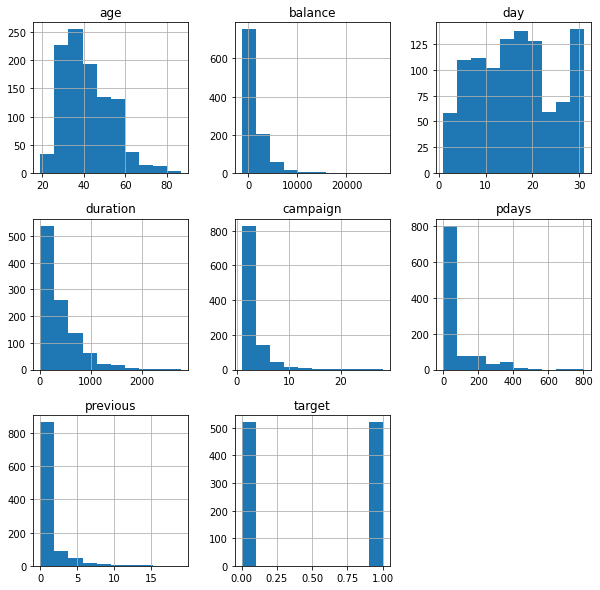

In [13]:
bnk.hist(figsize=(10, 10));

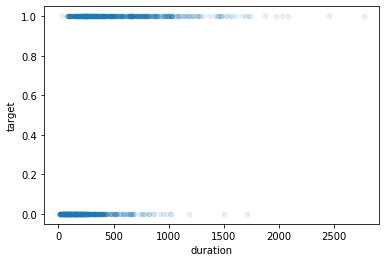

In [15]:
bnk.plot("duration", "target", kind = "scatter", alpha = 0.1)

In [16]:
features = bnk["duration"]
target = bnk["target"]

In [23]:
features = features.values.reshape(-1, 1)

In [21]:
features.values.reshape(-1, 1).shape

(1042, 1)

In [18]:
lg = LogisticRegression()

In [24]:
lg.fit(features, target)

LogisticRegression()

In [25]:
lg.intercept_

array([-1.54905868])

In [26]:
lg.coef_

array([[0.00443281]])

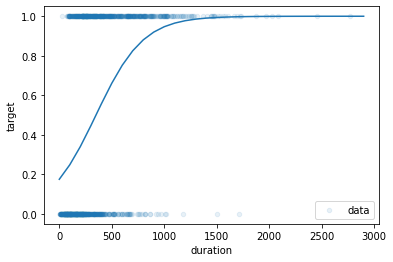

In [30]:
ax = bnk.plot("duration", "target", kind = "scatter", alpha = 0.1, label = "data")
x = np.arange(0, 3000, 100)
z = lg.coef_[0]*x + lg.intercept_
f = 1/ (1 +np.exp(-z))
ax.plot(x, f, label ="model")
ax.legend;

In [31]:
lg.predict(features)

array([0, 0, 0, ..., 1, 1, 1])

In [32]:
preddy = lg.predict(features)

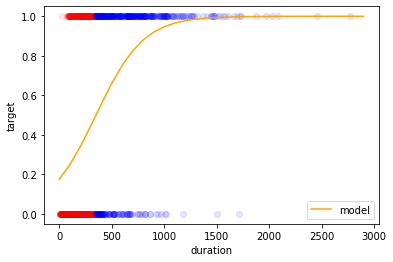

In [37]:
plt.scatter(features[preddy == 0], target[preddy == 0], alpha = 0.1, color="red")
plt.scatter(features[preddy == 1], target[preddy == 1], alpha = 0.1, color="blue")
plt.plot(x, f, color="orange", label="model")
plt.xlabel("duration")
plt.ylabel("target")
plt.legend();

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(target, preddy)

-0.15930902111324374

In [40]:
preddy == target

0        True
1        True
2        True
3       False
4        True
        ...  
1037     True
1038     True
1039     True
1040     True
1041     True
Name: target, Length: 1042, dtype: bool

In [41]:
(preddy == target).sum()

740

In [43]:
len(target)

1042

In [42]:
(preddy == target).sum() / len(target)

0.710172744721689

In [44]:
accuracy = (preddy == target).sum() / len(target)
print("Model accuracy = {0:.1f}%".format(accuracy*100))

Model accuracy = 71.0%
